In [1]:
import numpy as np
import pandas as pd
from google.cloud import bigquery
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager

In [2]:
def consulta_desde_archivo(sql):
    # Lee el contenido del archivo SQL
    with open(sql, "r") as file:
        sql = file.read()

    # Ejecuta la consulta y convierte los resultados a un DataFrame de pandas
    cliente = bigquery.Client()
    df_resultado = cliente.query(sql).to_dataframe()
    print(df_resultado.head(2))
    return df_resultado

def asignar_cuadrantes(df, names, condiciones, etiquetas):
    """
    Segmenta el DataFrame `df` basado en las condiciones proporcionadas
    para un conjunto específico de columnas y asigna la etiqueta especificada.

    Parámetros:
    - df: DataFrame de pandas.
    - columnas: Lista de nombres de columnas a considerar.
    - condiciones: Lista de condiciones correspondientes a las columnas en formato de cadena.
    - etiqueta: Etiqueta a asignar cuando se cumplen las condiciones.
    """
    for cond1 in condiciones[names[0]]:
        for cond2 in condiciones[names[1]]:
            mask = (df[names[0]] == cond1) & (df[names[1]] == cond2)
            cuadrante = etiquetas[condiciones[names[0]].index(cond1) * len(condiciones[names[1]]) + condiciones[names[1]].index(cond2)]
            df.loc[mask, 'Cuadrante_Final'] = cuadrante


In [4]:
# Llama a la función con el nombre de tu archivo SQL
df=consulta_desde_archivo("../querys/interacciones.sql") 

                                              td_id1  nInteracciones  \
0  a89e08e95191d76b8e35bc7170fa4f522dd8ef55a813aa...               1   
1  26eb0c52c92bcf7715f308f83e04f0e64efef67e355e30...               1   

   Dias_interaccion abi_brand  
0               274     Poker  
1               274     Poker  


In [3]:
df.shape

(419824, 4)

In [4]:
# Crear un nuevo DataFrame con valores menores o iguales a 1
menores1 = df[df['nInteracciones'] <= 1].copy()
# Excluir los valores menores o iguales a 1 del DataFrame original
df = df[df['nInteracciones'] > 1].copy()

In [5]:
menores1.shape

(321143, 4)

In [6]:
df.shape

(98681, 4)

[83.0 190.0]


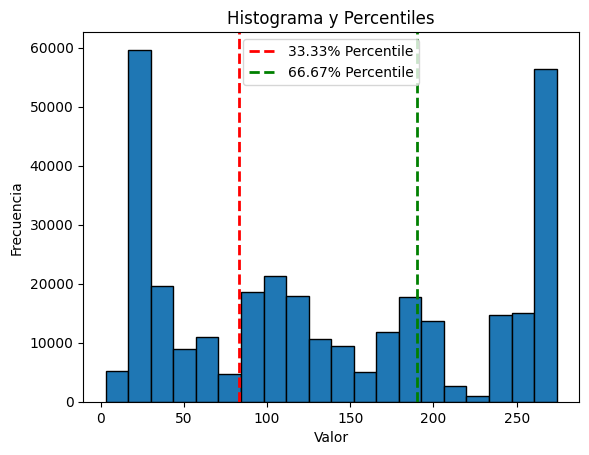

In [8]:
# Calcula el histograma
hist, bins = np.histogram(menores1.Dias_interaccion, bins=20)  # Puedes ajustar el número de bins según tu preferencia

# Calcula percentiles
percentiles = np.percentile(menores1.Dias_interaccion, [33.33, 66.67])
print(percentiles)

# Crea el histograma
plt.hist(menores1.Dias_interaccion, bins=20, edgecolor='black')
plt.axvline(percentiles[0], color='red', linestyle='dashed', linewidth=2, label='33.33% Percentile')
plt.axvline(percentiles[1], color='green', linestyle='dashed', linewidth=2, label='66.67% Percentile')

# Añade etiquetas y título
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma y Percentiles')
plt.legend()

# Muestra el histograma
plt.show()

[83.0 190.0]


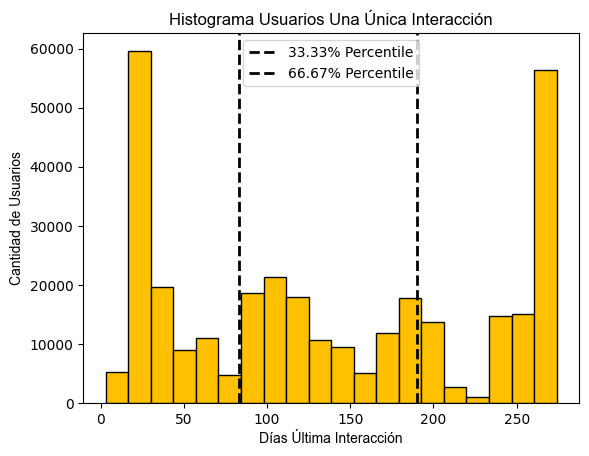

In [19]:
# Calcula el histograma
hist, bins = np.histogram(menores1.Dias_interaccion, bins=20)  # Puedes ajustar el número de bins según tu preferencia

# Calcula percentiles
percentiles = np.percentile(menores1.Dias_interaccion, [33.33, 66.67])
print(percentiles)

# Crea el histograma
plt.hist(menores1.Dias_interaccion, bins=20, edgecolor='black', color=(255/255, 192/255, 0))
plt.axvline(percentiles[0], color='black', linestyle='dashed', linewidth=2, label='33.33% Percentile')
plt.axvline(percentiles[1], color='black', linestyle='dashed', linewidth=2, label='66.67% Percentile')

# Añade etiquetas y título
plt.xlabel('Días Última Interacción', fontname='Arial')
plt.ylabel('Cantidad de Usuarios', fontname='Arial')
plt.title('Histograma Usuarios Una Única Interacción', fontname='Arial')
plt.legend()

# Muestra el histograma
plt.show()

In [11]:
# Segmentar cuadrantes según condiciones (ejemplo)
menores1['Cuadrante'] = ''
menores1.loc[(menores1['Dias_interaccion'] > 190), 'Cuadrante'] = 'Ice'
menores1.loc[(menores1['Dias_interaccion'] >= 87) & (menores1['Dias_interaccion'] <= 190), 'Cuadrante'] = 'Midi'
menores1.loc[(menores1['Dias_interaccion'] < 87), 'Cuadrante'] = 'Early'
# Crear una tabla de frecuencias cruzadas
tabla_frecuencias = pd.crosstab(index=menores1['Cuadrante'], columns='count')
print(tabla_frecuencias)

col_0       count
Cuadrante        
Early      111149
Ice        108273
Midi       105743


In [7]:
# Segmentar en 9 cuadrantes según condiciones (ejemplo)
menores1['Cuadrante'] = ''
menores1.loc[(menores1['Dias_interaccion'] > 200), 'Cuadrante'] = 'Ice'
menores1.loc[(menores1['Dias_interaccion'] >= 87) & (menores1['Dias_interaccion'] <= 200), 'Cuadrante'] = 'Midi'
menores1.loc[(menores1['Dias_interaccion'] < 87), 'Cuadrante'] = 'Early'
# Crear una tabla de frecuencias cruzadas
tabla_frecuencias = pd.crosstab(index=menores1['Cuadrante'], columns='count')
print(tabla_frecuencias)

col_0       count
Cuadrante        
Early      112936
Ice        106212
Midi       115853


[85.0 121.0]


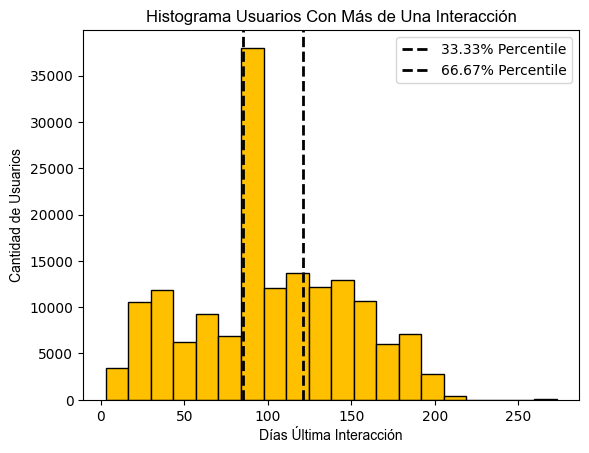

In [22]:
# Calcula el histograma
hist, bins = np.histogram(df.Dias_interaccion, bins=20)  # Puedes ajustar el número de bins según tu preferencia

# Calcula percentiles
percentiles = np.percentile(df.Dias_interaccion, [33.33, 66.67])
print(percentiles)
# Crea el histograma
plt.hist(df.Dias_interaccion, bins=20, edgecolor='black', color=(255/255, 192/255, 0))
plt.axvline(percentiles[0], color='black', linestyle='dashed', linewidth=2, label='33.33% Percentile')
plt.axvline(percentiles[1], color='black', linestyle='dashed', linewidth=2, label='66.67% Percentile')

# Añade etiquetas y título
plt.xlabel('Días Última Interacción', fontname='Arial')
plt.ylabel('Cantidad de Usuarios', fontname='Arial')
plt.title('Histograma Usuarios Con Más de Una Interacción', fontname='Arial')
plt.legend()

# Muestra el histograma
plt.show()

[3.0 17.0]


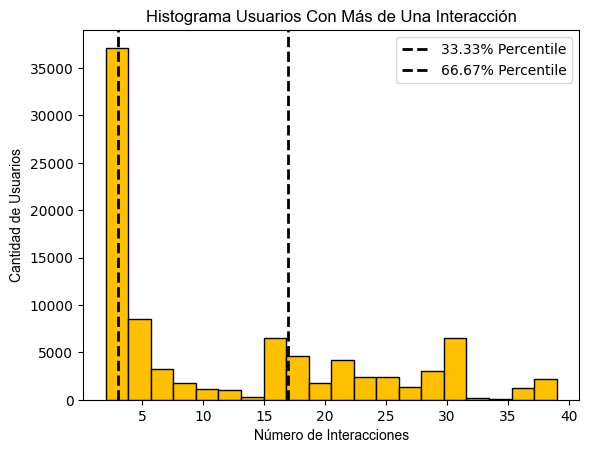

In [11]:
# Calcula el histograma
# Calcula el percentil 99
percentil_90 = np.percentile(df.nInteracciones, 90)

# Crea el subset excluyendo los valores superiores al percentil 99
df_subset = df[df.nInteracciones <= percentil_90]

hist, bins = np.histogram(df_subset.nInteracciones, bins=20)  # Puedes ajustar el número de bins según tu preferencia

# Calcula percentiles
percentiles = np.percentile(df_subset.nInteracciones, [33.33, 66.67])
print(percentiles)
# Crea el histograma
plt.hist(df_subset.nInteracciones, bins=20, edgecolor='black', color=(255/255, 192/255, 0))
plt.axvline(percentiles[0], color='black', linestyle='dashed', linewidth=2, label='33.33% Percentile')
plt.axvline(percentiles[1], color='black', linestyle='dashed', linewidth=2, label='66.67% Percentile')

# Añade etiquetas y título
plt.xlabel('Número de Interacciones', fontname='Arial')
plt.ylabel('Cantidad de Usuarios', fontname='Arial')
plt.title('Histograma Usuarios Con Más de Una Interacción', fontname='Arial')
plt.legend()

# Muestra el histograma
plt.show()

In [9]:
# Segmentar en 9 cuadrantes según condiciones (ejemplo)
df['CuadranteDias'] = ''
df.loc[(df['Dias_interaccion'] > 120), 'CuadranteDias'] = 'Ice'
df.loc[(df['Dias_interaccion'] >= 83) & (df['Dias_interaccion'] <= 120), 'CuadranteDias'] = 'Midi'
df.loc[(df['Dias_interaccion'] < 83), 'CuadranteDias'] = 'Early'
# Crear una tabla de frecuencias cruzadas
tabla_frecuencias_1 = pd.crosstab(index=df['CuadranteDias'], columns='count')
print(tabla_frecuencias_1)

col_0          count
CuadranteDias       
Early          48471
Ice            54980
Midi           61884


In [10]:
df['CuadranteInteracciones'] = ''
df.loc[(df['nInteracciones'] > 10), 'CuadranteInteracciones'] = 'High'
df.loc[(df['nInteracciones'] >=3) & (df['nInteracciones'] <= 10), 'CuadranteInteracciones'] = 'Mid'
df.loc[(df['nInteracciones'] < 3), 'CuadranteInteracciones'] = 'Low'
# Crear una tabla de frecuencias cruzadas
tabla_frecuencias_2 = pd.crosstab(index=df['CuadranteInteracciones'], columns='count')
print(tabla_frecuencias_2)

col_0                   count
CuadranteInteracciones       
High                    53832
Low                     44794
Mid                     66709


In [11]:
df.head()

,td_id1,nInteracciones,Dias_interaccion,abi_brand,CuadranteDias,CuadranteInteracciones
240,0b3f7960-b852-4c33-a650-96b9bf6338ef,2,274,Poker,Ice,Low
1789,10e171d38361640e0ec4b439d6e6d6b2f4cbbc6746225f...,2,274,Poker,Ice,Low
3988,313ba1e882f8e47c163ba2f676f05c719311b5e977d37f...,2,273,Poker,Ice,Low
6824,502647d9-3185-47ed-bb20-b0aa4f3e8217,2,272,Poker,Ice,Low
6863,2d0f89258a03529e6f5f0ca7f685e188f218c874d6f3c6...,2,272,Poker,Ice,Low


In [12]:
def asignar_cuadrantes(df, names, condiciones, etiquetas):
    for cond1 in condiciones[names[0]]:
        for cond2 in condiciones[names[1]]:
            mask = (df[names[0]] == cond1) & (df[names[1]] == cond2)
            cuadrante = etiquetas[condiciones[names[0]].index(cond1) * len(condiciones[names[1]]) + condiciones[names[1]].index(cond2)]
            df.loc[mask, 'Cuadrante_Final'] = cuadrante

In [13]:
# cuadrante final 
names = ['CuadranteDias', 'CuadranteInteracciones']
condiciones_Dias = ['Early', 'Midi,', 'Ice']
condiciones_Interaccione = ['Low', 'Mid', 'High']
etiquetas=['1,1', '1,2', '1,3', '2,1', '2,2', '2,3', '3,1', '3,2', '3,3']
df.loc[(df[names[0]] == condiciones_Dias[0]) & (df[names[1]] == condiciones_Interaccione[0]), 'Cuadrante_Final'] = etiquetas[0]

# segmentar_y_etiquetar(df, names, ['==Ice', '==Low'], 'Ice-Low')


In [14]:
names = ['CuadranteDias', 'CuadranteInteracciones']
condiciones = {
    'CuadranteDias': ['Early', 'Midi', 'Ice'],
    'CuadranteInteracciones': ['Low', 'Mid', 'High']
}
etiquetas = ['1,1', '1,2', '1,3', '2,1', '2,2', '2,3', '3,1', '3,2', '3,3']

asignar_cuadrantes(df, names, condiciones, etiquetas)

In [15]:
df.Cuadrante_Final.value_counts()

Cuadrante_Final
2,2    28900
3,3    25538
1,2    23009
2,3    18252
1,1    15420
3,2    14800
2,1    14732
3,1    14642
1,3    10042
Name: count, dtype: int64

In [23]:
df[df.Cuadrante_Final=='3,3']


,td_id1,nInteracciones,Dias_interaccion,abi_brand,CuadranteDias,CuadranteInteracciones,Cuadrante_Final
99400,b840a629-a599-468a-91c7-aeb3bb16e490,12,206,Poker,Ice,High,"3,3"
101126,eadc66583c5d6614c60413b59795cf41a5d3f12ab7a720...,11,205,Poker,Ice,High,"3,3"
101323,cc273c6e-8a49-45e9-b5b1-5b2c8536b450,15,205,Poker,Ice,High,"3,3"
102316,8a715db0-0e9f-42f0-92cb-f9cdb205b300,22,205,Poker,Ice,High,"3,3"
104353,3046148df3d8b1015ec4f00c5c6d5547d2e458b54701ef...,14,203,Poker,Ice,High,"3,3"
...,...,...,...,...,...,...,...
225789,acfecf792e6934d1660229223e75c50280a25bc94210f8...,46,121,Poker,Ice,High,"3,3"
225790,e73a45c6eb22458aee05ce5e4a30bc6072b305c3ad4a16...,18,121,Poker,Ice,High,"3,3"
225791,b5462322479b6ac2934781de5ccb6b075fec5a406a8fb0...,30,121,Poker,Ice,High,"3,3"
225797,871b0e573e3e6a37f7630a244322ec71288c615c6b51fd...,30,121,Poker,Ice,High,"3,3"


In [ ]:
# Guardar el DataFrame como un archivo CSV
df.to_csv('interacciones.csv', index=False)

In [31]:
 # Ejecuta la consulta y convierte los resultados a un DataFrame de pandas
sql='''
select
td_id,
Clasificacion
from
`abi-martech-maz-col.tadabra.Master_Tada_acumulado`
where td_id is not null 
'''
cliente = bigquery.Client()
df_resultado = cliente.query(sql).to_dataframe()
print(df_resultado.head(2))

                                               td_id Clasificacion
0  82295389f559f471b94d57f1357936e9d07d723cb6d0fd...          Core
1  85fef6505c972d90a70ddcb08fd5bd96042823b5da9b59...          Core


In [33]:
base = pd.merge(menores1, df_resultado, left_on='td_id1', right_on='td_id', how='left')

In [34]:
base.head()

,td_id1,nInteracciones,Dias_interaccion,abi_brand,Cuadrante,td_id,Clasificacion
0,1dce7c1c-d746-407c-be36-b9426c8d13b8,1,274,Poker,Ice,NaN,NaN
1,731abda6f730a69d60b2dd9f75c594c0d71a38b7e8530a...,1,274,Poker,Ice,NaN,NaN
2,a2373e298e22af1b241193091d284bfd0092a80c3442bd...,1,274,Poker,Ice,NaN,NaN
3,8e4a11c2175ba44266aed920d97d712525a834188090ba...,1,274,Poker,Ice,NaN,NaN
4,2423441d12b650feb6cb3465290179cbfcee07e72f20ed...,1,274,Poker,Ice,NaN,NaN


In [28]:
filtro = ['Casual', 'Core', 'Power', 'First Month']
base_rfm=base[base['Clasificacion'].isin (filtro)]

In [29]:
base_rfm.Clasificacion.value_counts()

Clasificacion
Casual         3523
Core           1806
Power          1314
First Month     763
Name: count, dtype: int64

In [30]:
# Filtrar valores sin NaN en 'Columna'
base_rfm_final = base_rfm.dropna(subset=['td_id'])

In [35]:
df.head()

,td_id1,nInteracciones,Dias_interaccion,abi_brand,CuadranteDias,CuadranteInteracciones,Cuadrante_Final
240,0b3f7960-b852-4c33-a650-96b9bf6338ef,2,274,Poker,Ice,Low,"3,1"
1789,10e171d38361640e0ec4b439d6e6d6b2f4cbbc6746225f...,2,274,Poker,Ice,Low,"3,1"
3988,313ba1e882f8e47c163ba2f676f05c719311b5e977d37f...,2,273,Poker,Ice,Low,"3,1"
6824,502647d9-3185-47ed-bb20-b0aa4f3e8217,2,272,Poker,Ice,Low,"3,1"
6863,2d0f89258a03529e6f5f0ca7f685e188f218c874d6f3c6...,2,272,Poker,Ice,Low,"3,1"


In [32]:
base_rfm_final.Clasificacion.value_counts()

Clasificacion
Casual    4286
Core      1806
Power     1314
Name: count, dtype: int64

In [34]:
base_rfm_final.shape

(7406, 9)

In [31]:
base_rfm_final.loc[(base_rfm_final['Clasificacion'] =='First Month') , 'Clasificacion'] = 'Casual'

In [36]:
names = ['CuadranteDias', 'CuadranteInteracciones']
condiciones = {
    'CuadranteDias': ['Early', 'Midi', 'Ice'],
    'CuadranteInteracciones': ['Low', 'Mid', 'High']
}
etiquetas = ['1,1', '1,2', '1,3', '2,1', '2,2', '2,3', '3,1', '3,2', '3,3']

asignar_cuadrantes(base_rfm_final, names, condiciones, etiquetas)

In [43]:
base_rfm_final[base_rfm_final.Cuadrante_Final=='3,1']

,td_id1,nInteracciones,Dias_interaccion,abi_brand,CuadranteDias,CuadranteInteracciones,Cuadrante_Final,td_id,Clasificacion
32,4f24beca-cd84-43d0-ab4f-79f9493ff4ef,2,264,Poker,Ice,Low,"3,1",4f24beca-cd84-43d0-ab4f-79f9493ff4ef,Casual
280,e27eb0a2b9caf2ece6c34ecf23174e35a1e28fede370ee...,2,206,Poker,Ice,Low,"3,1",e27eb0a2b9caf2ece6c34ecf23174e35a1e28fede370ee...,Power
315,4314998c2b817ba8f293623ea4af1d875283554ec50724...,2,206,Poker,Ice,Low,"3,1",4314998c2b817ba8f293623ea4af1d875283554ec50724...,Casual
411,92fa854e-4f4f-4ddb-ba98-340657d2ac03,2,206,Poker,Ice,Low,"3,1",92fa854e-4f4f-4ddb-ba98-340657d2ac03,Power
412,92fa854e-4f4f-4ddb-ba98-340657d2ac03,2,206,Poker,Ice,Low,"3,1",92fa854e-4f4f-4ddb-ba98-340657d2ac03,Power
...,...,...,...,...,...,...,...,...,...
54683,384a5450854ad7c6c112594d87111ff2c76ca3ea29c98e...,2,122,Poker,Ice,Low,"3,1",384a5450854ad7c6c112594d87111ff2c76ca3ea29c98e...,Core
54996,7998a5c6b7eb0bd1147358c5ee30596317282c70af96de...,2,121,Poker,Ice,Low,"3,1",7998a5c6b7eb0bd1147358c5ee30596317282c70af96de...,Core
55098,fca4abff-4738-4d19-a91f-cb27ce7a5ac4,2,121,Poker,Ice,Low,"3,1",fca4abff-4738-4d19-a91f-cb27ce7a5ac4,Core
55183,5a9b3a10acf46f74b0a94ce6c1c50e069dbb1cb85decda...,2,121,Poker,Ice,Low,"3,1",5a9b3a10acf46f74b0a94ce6c1c50e069dbb1cb85decda...,Casual


In [38]:
base_rfm_final.Cuadrante_Final.value_counts()

Cuadrante_Final
2,2    1976
1,2    1484
3,2     967
3,1     807
2,1     735
1,1     547
1,3     462
2,3     308
3,3     120
Name: count, dtype: int64